In [1]:
import sys
from os.path import dirname, abspath
sys.path.insert(0, dirname(abspath('')))

In [2]:
def clean_doc(x_doc, y_doc): 
    drop_range = 25

    idx_to_drop = []
    for i in range(drop_range, len(y_doc) - drop_range - 1):
        if all([y_doc[j] == 'OTHER' for j in range(i-drop_range,i+drop_range+1)]):
            idx_to_drop.append(i)

    y_clean = [l for i, l in enumerate(y_doc) if i not in idx_to_drop]
    x_clean = [x_data for i, x_data in enumerate(x_doc) if i not in idx_to_drop]
    return x_clean, y_clean

In [3]:
to_import = [
    'utils',
    'config_loader',
    'base.pipeline.csv_loader',
    'base.preprocessor.crf_preprocessor',
    'base.model.multi_model'
]



# Import modules
import os
import json
import logging
import importer
importer.import_modules(__name__, os.path.abspath(''), to_import)
utils.set_logger('info')
logger = logging.getLogger('pipeline')

#### Get Config ############################################################
project_path = os.path.abspath('')
Config = config_loader.ConfigLoader('config_hacizkaldırma.json', project_path = project_path)

with open("label_mapping_hacizkaldırma.json", encoding='utf-8') as f:
    label_mapping = json.load(f)

Config.data_columns = Config["data_columns"]
Config.label_mapping = {}#label_mapping

################################################################################

labels = list(label_mapping.keys())
labels.append('OTHER')

Using TensorFlow backend.
c:\users\veriparkozan\desktop\veripark\env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\veriparkozan\desktop\veripark\env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\veriparkozan\desktop\veripark\env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\veriparkozan\desk

In [4]:
data_loader = csv_loader.CSVLoader(**Config["csv_loader_params"])
feature_extractor = crf_preprocessor.TextFeatureExtractor()
model = multi_model.MultiModel(**Config["model_params"])

In [5]:
debug = False

files_to_clear = [
    'data/mlp_trials',
    'data/sklearn_trials'
]
for filename in files_to_clear:
    utils.delete_file(os.path.join(project_path, filename))


x = {}
x = data_loader(x, debug)

print(x['data'].TARGET.value_counts())
print(x['data'].TARGET.isnull().mean())

x = feature_extractor.fit_transform(x)

results = model.search(x, debug)

Minimize: False                                                                                                        
 98%|██████████████████████████████████████████████ | 49/50 [09:44<00:09,  9.24s/trial, best loss: -0.9806873213139623]

 pipeline :: INFO     :: Saved trials to C:\Users\veriparkozan\Desktop\veripark\Haciz_NER\data\sklearn_trials


100%|███████████████████████████████████████████████| 50/50 [09:45<00:00, 11.70s/trial, best loss: -0.9806873213139623]

 pipeline :: INFO     :: Best metric: 0.9806873213139623
 pipeline :: INFO     :: <b>SELECTED HPARAMETERS: </b>
 pipeline :: INFO     :: {'algorithm': 'lbfgs', 'all_possible_states': True, 'all_possible_transitions': True, 'c1': 0.0553307921799476, 'c2': 0.07036461497247103, 'delta': 0.06758722499986575, 'epsilon': 0.04341141422203385, 'linesearch': 'MoreThuente', 'max_linesearch': 13, 'min_freq': 9, 'num_memories': 18, 'period': 13}
 pipeline :: INFO     :: Best search hparameters: {'algorithm': 'lbfgs', 'all_possible_states': True, 'all_possible_transitions': True, 'c1': 0.0553307921799476, 'c2': 0.07036461497247103, 'delta': 0.06758722499986575, 'epsilon': 0.04341141422203385, 'linesearch': 'MoreThuente', 'max_linesearch': 13, 'min_freq': 9, 'num_memories': 18, 'period': 13}
 pipeline :: INFO     :: Fitting sklearn model...


 pipeline :: INFO     :: Metric: 0.9806873213139623


In [6]:
from sklearn_crfsuite import metrics

y_pred = model.predict({'output': x['train_data'][0]})['output']
print(metrics.flat_classification_report(x['train_data'][1], y_pred, labels = labels))

              precision    recall  f1-score   support

         kur       0.98      0.99      0.99      2270
         bor       0.98      0.98      0.98      1963
          al       0.99      0.99      0.99       958
        avek       0.92      0.97      0.94       706
         tar       0.98      0.96      0.97       502
        dos2       0.98      0.98      0.98       252
        tbor       0.98      0.99      0.98       290
         dos       0.96      0.94      0.95       249
        bvek       0.94      0.70      0.80       199
        vbor       0.96      0.89      0.93       154
         val       0.98      0.93      0.95        67
         tut       1.00      0.98      0.99        58
         tal       1.00      0.97      0.98        32
       OTHER       1.00      1.00      1.00     63500

    accuracy                           1.00     71200
   macro avg       0.98      0.95      0.96     71200
weighted avg       1.00      1.00      1.00     71200



              precision    recall  f1-score   support

         kur       0.99      0.92      0.95       521
         bor       0.98      0.82      0.89       494
          al       0.97      1.00      0.99       175
        avek       0.95      0.96      0.96        79
         tar       0.91      0.74      0.81       107
        dos2       0.97      0.75      0.84        87
        tbor       0.97      0.90      0.94        83
         dos       0.98      0.88      0.93        59
        bvek       0.80      0.50      0.62        16
        vbor       0.91      0.70      0.79        30
         val       0.93      1.00      0.97        14
         tut       0.83      0.71      0.77         7
         tal       1.00      1.00      1.00         4
       OTHER       0.98      1.00      0.99     12883

    accuracy                           0.98     14559
   macro avg       0.94      0.85      0.89     14559
weighted avg       0.98      0.98      0.98     14559



(14.0, 0.0)

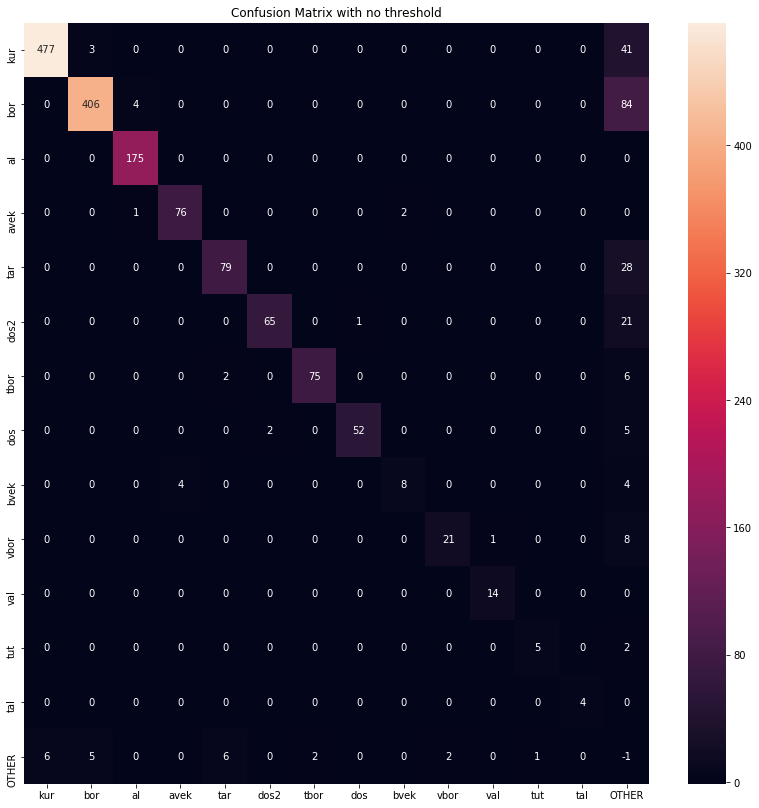

In [7]:
from sklearn_crfsuite import metrics
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

"""x = {}
test_df = pd.read_csv('data/test.csv', names = ["FILENAME", "X", "Y", "WORD_I", "LINE_I", "TOKEN", "TARGET"])
x['data'] = test_df
x = feature_extractor.fit_transform(x)
test_X = x['val_data'][0] + x['train_data'][0]
test_y = x['val_data'][1] + x['train_data'][1]
x['test_data'] = (test_X, test_y)"""

x_test = x['test_data'][0]
y_pred = model.predict({'output': x_test})['output']
n_classes = len(labels)

x_test = list(itertools.chain.from_iterable(x_test))
y_pred = list(itertools.chain.from_iterable(y_pred))
y = list(itertools.chain.from_iterable(x['test_data'][1]))
x_test_notnl = [i for i, ex in enumerate(x_test) if 'word.lower()' not in ex or str(ex['word.lower()']) != 'newline']

# Select examples that are not 'newline'
y = [ex for i, ex in enumerate(y) if i in x_test_notnl]
y_pred = [ex for i, ex in enumerate(y_pred) if i in x_test_notnl]

print(classification_report(y, y_pred, labels = labels))

conf = pd.DataFrame(confusion_matrix(y, y_pred, labels = labels), index = labels, columns = labels) #, labels = labels
conf.loc['OTHER', 'OTHER'] = -1
fig, ax = plt.subplots(figsize = (n_classes,n_classes))

ax.set_title('Confusion Matrix with no threshold')
sns.heatmap(conf, annot = True, fmt = 'd', xticklabels = labels, yticklabels = labels, ax = ax)

bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5)


In [29]:
y = pd.Series(y).reset_index(drop = True)
y_pred = pd.Series(y_pred).reset_index(drop = True)
x_test = pd.Series(x_test)

ex = x_test[(y == 'bor') & (y_pred == 'OTHER')]

In [32]:
x_test.iloc[1]

{'bias': 1.0,
 'word.index': 2,
 'punc_ratio': 0.0,
 'word.lineindex': 55,
 'word.wordindex': 14,
 'word.digitratio': 0.0,
 'word.digitcount': 0,
 'word.length': 3,
 'word.lower()': 'ile',
 'word.isupper()': False,
 '-1:word.lower()': 'newline',
 '-2:word.lower()': 'kotan',
 '+1:word.lower()': 'newline',
 '+2:word.lower()': 'tarih',
 '+3:word.lower()': 'newline',
 '+4:word.lower()': 'newline'}

### Select example

In [10]:
raw_data = pd.read_csv('data/raw_data_joined.csv', names = ['FILENAME', 'y', 'x', 'WORD_I', 'LINE_I', 'TOKEN', 'target'])

In [11]:
filenames = raw_data.FILENAME.unique().tolist()

In [71]:
ex = raw_data[raw_data.FILENAME == filenames[-27]]
ex['target'] = ex['target'].fillna('OTHER')

c:\users\veriparkozan\desktop\veripark\env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
ex_proc = feature_extractor.transform({'output': ex})

preds = model.predict({'output': [ex_proc['output'][0]]})

ex['pred'] = preds['output'][0]

print((ex['target'] == ex['pred']).mean())

0.9720670391061452


c:\users\veriparkozan\desktop\veripark\env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [73]:
pd.options.display.max_rows = 700

In [74]:
ex.iloc[:250]

,FILENAME,y,x,WORD_I,LINE_I,TOKEN,target,pred
90038,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,4.375150,1.511925,0,0,T.C.,kur,kur
90039,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,4.375150,1.511925,1,1,NEWLINE,kur,kur
90040,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,3.566925,1.697125,0,1,GELIR,kur,kur
90041,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,4.138650,1.694325,1,1,IDARESI,kur,kur
90042,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,4.950525,1.688925,2,1,BASKANLIGI,kur,kur
90043,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,4.950525,1.688925,3,2,NEWLINE,kur,kur
90044,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,3.600350,1.879725,0,2,Izmir,kur,kur
90045,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,3.979900,1.881800,1,2,Vergi,kur,kur
90046,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,4.403450,1.884125,2,2,Dairesi,kur,kur
90047,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,4.981025,1.887350,3,2,Baskanligi,kur,kur


In [75]:
ex[ex.target != ex.pred]

,FILENAME,y,x,WORD_I,LINE_I,TOKEN,target,pred
90055,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,2.644900,2.813575,1,4,: ######## - ### . ## -E. ######,dos,dos2
90056,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,2.644900,2.813575,2,5,NEWLINE,dos,dos2
90091,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,2.089125,4.958225,0,13,###########,OTHER,tbor
90097,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,5.842625,4.967475,6,13,## . ## . ####,OTHER,tar
90202,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,3.824750,8.322025,0,35,########## / ###########,OTHER,vbor
90209,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,3.449350,8.534075,0,37,AGIRBASAN,bor,OTHER
90210,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,4.292650,8.532625,1,37,CAGATAY,bor,OTHER
90211,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,4.292650,8.532625,2,38,NEWLINE,bor,OTHER
90221,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,3.381450,8.960400,0,41,# . ### . ## -TL,tut,OTHER
90222,1cd1f7ab-20d6-4ca9-a13b-f5ebb285ff18.pdf,3.381450,8.960400,1,42,NEWLINE,tut,OTHER


In [70]:
ex.iloc[:250]

,FILENAME,y,x,WORD_I,LINE_I,TOKEN,target,pred
90396,1cd405b2-3e06-40f8-8be1-9378c48be25e.pdf,7.134625,0.999500,0,0,SE-ISO-EN,OTHER,OTHER
90397,1cd405b2-3e06-40f8-8be1-9378c48be25e.pdf,7.134625,0.999500,1,1,NEWLINE,OTHER,OTHER
90398,1cd405b2-3e06-40f8-8be1-9378c48be25e.pdf,7.935375,1.047725,0,1,Net,OTHER,OTHER
90399,1cd405b2-3e06-40f8-8be1-9378c48be25e.pdf,7.935375,1.047725,1,2,NEWLINE,OTHER,OTHER
90400,1cd405b2-3e06-40f8-8be1-9378c48be25e.pdf,1.069175,1.219375,0,2,MUKKALE,OTHER,kur
90401,1cd405b2-3e06-40f8-8be1-9378c48be25e.pdf,1.533125,1.199000,1,2,BELEDIYE,OTHER,kur
90402,1cd405b2-3e06-40f8-8be1-9378c48be25e.pdf,1.533125,1.199000,2,3,NEWLINE,OTHER,kur
90403,1cd405b2-3e06-40f8-8be1-9378c48be25e.pdf,4.662925,1.102900,0,3,T.C,kur,kur
90404,1cd405b2-3e06-40f8-8be1-9378c48be25e.pdf,4.662925,1.102900,1,4,NEWLINE,kur,kur
90405,1cd405b2-3e06-40f8-8be1-9378c48be25e.pdf,3.706850,1.287475,0,4,PAMUKKALE,kur,kur


In [41]:
ex_i = -1
ex = x['val_data'][0][ex_i]
labels = x['val_data'][1][ex_i]
raw_ex = raw_data.iloc[ex_i]

In [42]:
raw_ex

1d607ff8-b59a-49c3-a93e-6cba498337ab.pdf    1c7fc6e6-6dca-4118-902c-b7428a6fa53c.pdf
5.696475                                                                     2.68772
8.6912                                                                       1.89055
8                                                                                  0
37                                                                                 5
NEWLINE                                                                        BANKA
Unnamed: 6                                                                       NaN
Name: 105845, dtype: object

In [14]:
import eli5
eli5.show_weights(model.model.model, top=10, )

c:\users\veriparkozan\desktop\veripark\env\lib\site-packages\eli5\base_utils.py:28: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  init_args = inspect.getargspec(class_.__init__)
c:\users\veriparkozan\desktop\veripark\env\lib\site-packages\eli5\base_utils.py:36: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  return attr.s(class_, these=these, init=False, slots=True, **attrs_kwargs)  # type: ignore


From \ To,OTHER,al,avek,bor,bvek,dos,dos2,kur,tal,tar,tbor,tut,val,vbor
OTHER,0.533,-0.005,-0.003,-0.002,-0.139,-0.02,-0.018,0.637,-0.61,-0.002,-0.22,-0.506,-0.496,-0.471
al,-0.007,-0.011,0.0,-0.445,0.0,0.0,0.0,-0.044,0.0,0.0,0.0,0.0,0.0,0.0
avek,-0.003,0.0,0.505,-0.224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bor,-0.002,-0.008,-0.335,-0.004,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0,0.0,0.0
bvek,-0.127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dos,-0.021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dos2,-0.018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kur,0.543,-0.089,-0.016,0.0,0.0,0.0,0.025,0.922,0.0,0.0,0.0,0.0,0.0,0.0
tal,-0.455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tar,-0.001,0.0,0.0,-0.4,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
x_test[y == 'bor']

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [14]:
pd.options.display.max_rows = 200
x['data'][x['data'].TARGET == 'bor'].iloc[:200]

,DOC_NAME,TOKEN_ORIG,TOKEN,TARGET
117,000aabeb-9de2-4295-9bd7-eaff433164bd.pdf,gulsah,gulsah,bor
118,000aabeb-9de2-4295-9bd7-eaff433164bd.pdf,vuranok,vuranok,bor
268,000aabeb-9de2-4295-9bd7-eaff433164bd.pdf,gulsah,gulsah,bor
269,000aabeb-9de2-4295-9bd7-eaff433164bd.pdf,vuranok,vuranok,bor
485,000aabeb-9de2-4295-9bd7-eaff433164bd.pdf,ali,ali,bor
486,000aabeb-9de2-4295-9bd7-eaff433164bd.pdf,alpaslan,alpaslan,bor
627,000aabeb-9de2-4295-9bd7-eaff433164bd.pdf,ali,ali,bor
628,000aabeb-9de2-4295-9bd7-eaff433164bd.pdf,alpaslan,alpaslan,bor
773,000aabeb-9de2-4295-9bd7-eaff433164bd.pdf,borclu,borclu,bor
774,000aabeb-9de2-4295-9bd7-eaff433164bd.pdf,ramazan,ramazan,bor
